## Homework

In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

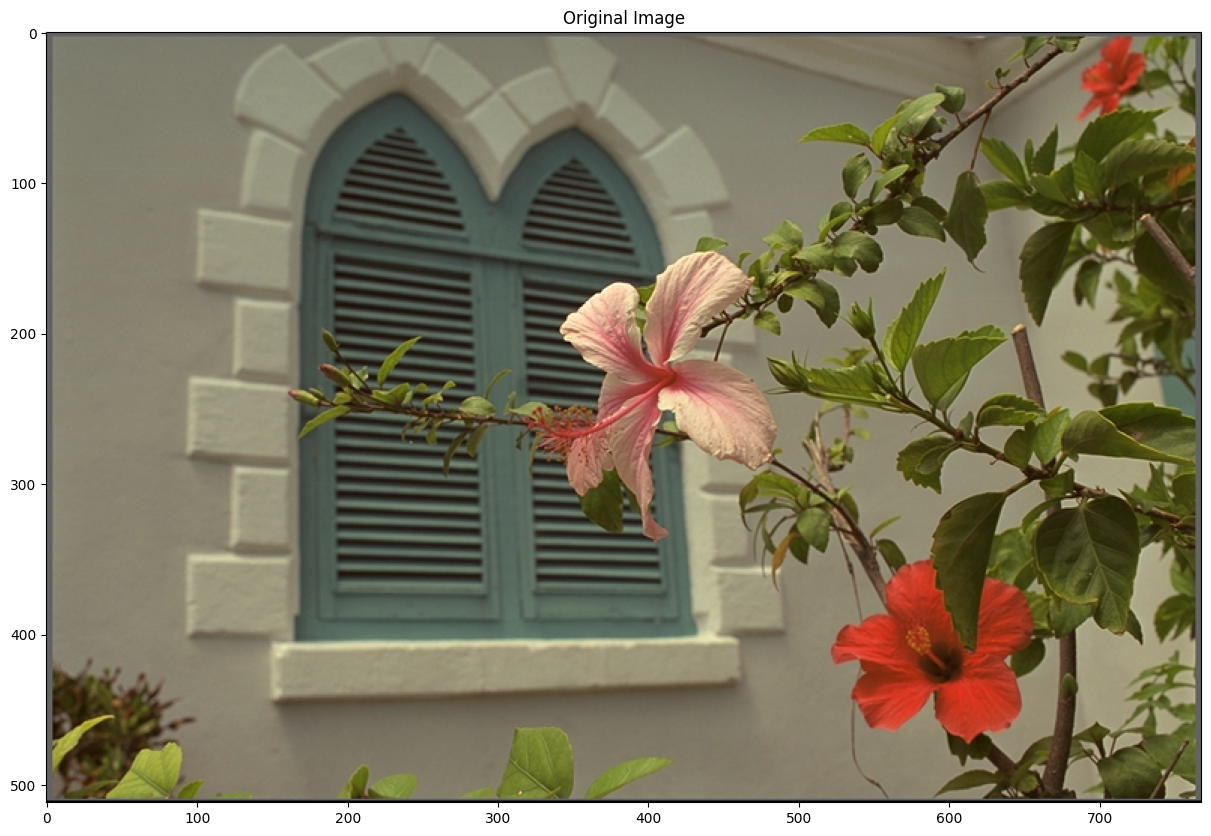

In [2]:
# Load image
img = cv2.imread('kodim07.png')

# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plot original image
plt.imshow(img)
plt.title('Original Image')
plt.show()


In [3]:
# Black, dark gray, light gray, white
colors = np.array([[0, 0, 0], 
                   [64, 64, 64], 
                   [192, 192, 192], 
                   [255, 255, 255]])

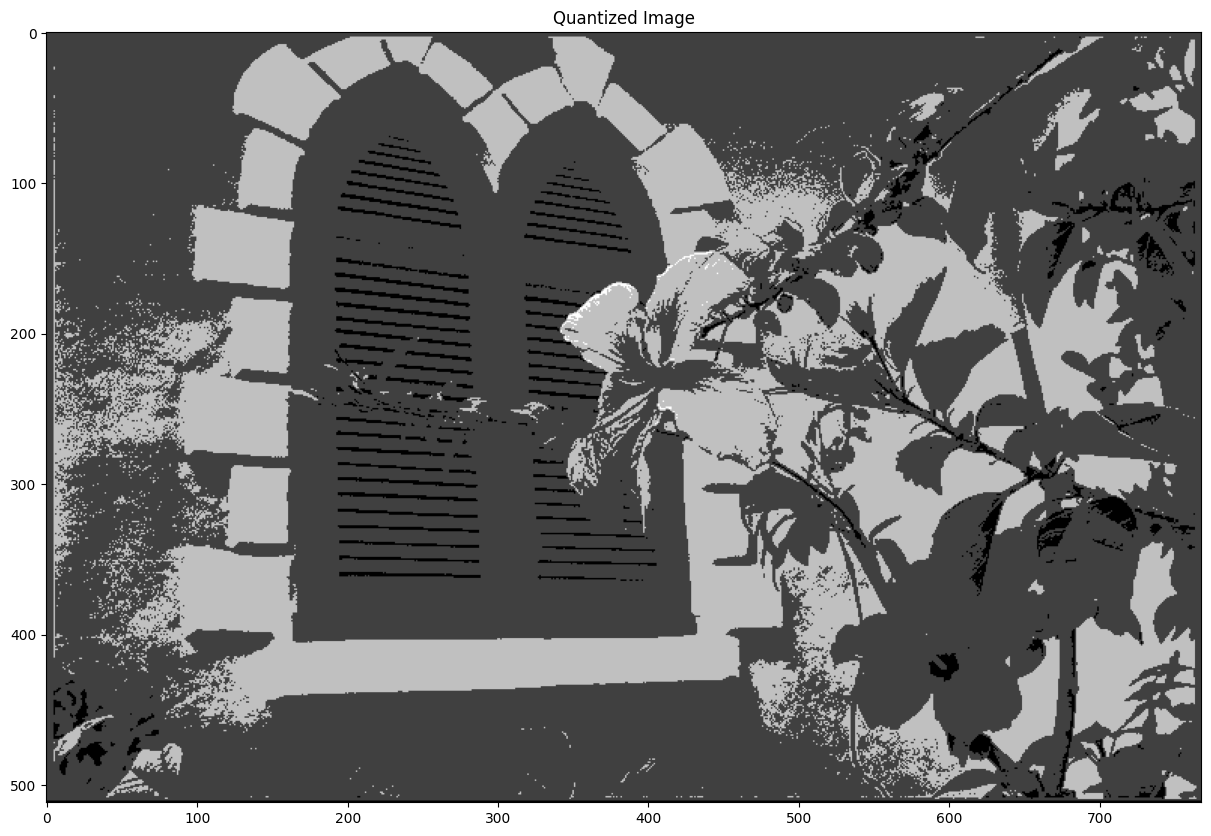

In [4]:
# Quantization function
def quantize(pixel):
    return colors[np.argmin(np.linalg.norm(colors - pixel, axis=1))]

# Apply quantization
quantized_img = np.zeros_like(img)
for r in range(img.shape[0]):
    for c in range(img.shape[1]):
        quantized_img[r, c] = quantize(img[r, c])

# Plot quantized image
plt.imshow(quantized_img)
plt.title('Quantized Image')
plt.show()

In [5]:
# Compute average quantization error
avg_quant_error = np.sqrt(np.mean((quantized_img - img) ** 2))
print("Average quantization error:", avg_quant_error)

Average quantization error: 10.393622744977792


In [ ]:
def floyd_steinberg_dithering(image):
    rows, cols, channels = image.shape
    dithered_img = np.zeros_like(image, dtype=np.uint8)
    image = image.astype(np.float64)  # Convert image to float64
    for r in range(rows):
        for c in range(cols):
            old_pixel = image[r, c]
            new_pixel = quantize(old_pixel)
            dithered_img[r, c] = new_pixel
            quant_error = old_pixel - new_pixel
            if c < cols - 1:
                image[r, c + 1] += quant_error * 7 / 16
            if r < rows - 1:
                if c > 0:
                    image[r + 1, c - 1] += quant_error * 3 / 16
                image[r + 1, c] += quant_error * 5 / 16
                if c < cols - 1:
                    image[r + 1, c + 1] += quant_error * 1 / 16
    return dithered_img

# Apply Floyd-Steinberg Dithering
dithered_image = floyd_steinberg_dithering(np.copy(img).astype(np.float64))  # Convert input image to float64

In [ ]:
# Plot dithered image
plt.imshow(dithered_image)
plt.title('Dithered Image')
plt.show()

In [ ]:
# Compute average quantization error for dithered image
avg_dith_error = np.sqrt(np.mean((dithered_image - img) ** 2))
print("Average quantization error for dithered image:", avg_dith_error)

## Question

In [ ]:
# Define color palette with only black and white
bw_colors = np.array([[0, 0, 0], 
                      [255, 255, 255]])

In [ ]:
# Quantization function for black and white
def bw_quantize(pixel):
    return bw_colors[np.argmin(np.linalg.norm(bw_colors - pixel, axis=1))]

# Apply quantization for black and white
bw_quantized_img = np.zeros_like(img)
for r in range(img.shape[0]):
    for c in range(img.shape[1]):
        bw_quantized_img[r, c] = bw_quantize(img[r, c])

# Plot quantized image for black and white
plt.imshow(bw_quantized_img, cmap='gray')
plt.title('Quantized Image (Black and White)')
plt.show()


In [ ]:
# Compute average quantization error for black and white
avg_bw_quant_error = np.sqrt(np.mean((bw_quantized_img - img) ** 2))
print("Average quantization error for black and white quantized image:", avg_bw_quant_error)

In [ ]:
# Apply Floyd-Steinberg Dithering for black and white
bw_dithered_image = floyd_steinberg_dithering(np.copy(img).astype(np.float64))

# Plot dithered image for black and white
plt.imshow(bw_dithered_image, cmap='gray')
plt.title('Dithered Image (Black and White)')
plt.show()

In [ ]:
# Compute average quantization error for dithered image for black and white
avg_bw_dith_error = np.sqrt(np.mean((bw_dithered_image - img) ** 2))
print("Average quantization error for dithered image (Black and White):", avg_bw_dith_error)


## KMeans

In [ ]:
from sklearn.cluster import KMeans

# Обчислити кластери кольорів за допомогою k-means
kmeans = KMeans(n_clusters=16).fit(np.reshape(img, (-1, 3)))  # Зображення має 3 канали (RGB)
colors = kmeans.cluster_centers_.astype(int)  # Кластерні центри представляють кольори


In [ ]:
# Apply quantization with KMeans optimized colors
quantized_img_kmeans = np.zeros_like(img)
for r in range(img.shape[0]):
    for c in range(img.shape[1]):
        quantized_img_kmeans[r, c] = quantize(img[r, c])

# Plot quantized image after KMeans
plt.imshow(quantized_img_kmeans)
plt.title('Quantized Image after KMeans')
plt.show()

In [ ]:
# Apply Floyd-Steinberg Dithering with KMeans optimized colors
dithered_img_kmeans = floyd_steinberg_dithering(np.copy(img).astype(np.float64))

# Plot dithered image after KMeans
plt.imshow(dithered_img_kmeans)
plt.title('Dithered Image after KMeans')
plt.show()